<a href="https://colab.research.google.com/github/duckbillLvr/software-lecture/blob/main/lecture4_1assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install finterstellar

In [2]:
import finterstellar as fs

### 기간은 2007년 1분기 최초 투자 ~ 2021년 1분기까지 완료(15년간)

In [3]:
terms = fs.set_terms(trade_start='2007Q1', trade_end='2021Q1')
terms

Index(['2006Q4', '2007Q1', '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2',
       '2008Q3', '2008Q4', '2009Q1', '2009Q2', '2009Q3', '2009Q4', '2010Q1',
       '2010Q2', '2010Q3', '2010Q4', '2011Q1', '2011Q2', '2011Q3', '2011Q4',
       '2012Q1', '2012Q2', '2012Q3', '2012Q4', '2013Q1', '2013Q2', '2013Q3',
       '2013Q4', '2014Q1', '2014Q2', '2014Q3', '2014Q4', '2015Q1', '2015Q2',
       '2015Q3', '2015Q4', '2016Q1', '2016Q2', '2016Q3', '2016Q4', '2017Q1',
       '2017Q2', '2017Q3', '2017Q4', '2018Q1', '2018Q2', '2018Q3', '2018Q4',
       '2019Q1', '2019Q2', '2019Q3', '2019Q4', '2020Q1', '2020Q2', '2020Q3',
       '2020Q4'],
      dtype='object')

In [4]:
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp='16474954571099712210', term=t)

2006Q4...OK
2007Q1...OK
2007Q2...OK
2007Q3...OK
2007Q4...OK
2008Q1...OK
2008Q2...OK
2008Q3...OK
2008Q4...OK
2009Q1...OK
2009Q2...OK
2009Q3...OK
2009Q4...OK
2010Q1...OK
2010Q2...OK
2010Q3...OK
2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


### 이익 대비 저평가 종목, PER(주가수익비율)
- PER 계산
- PER 값이 낮은 순서대로 투자할 30개 종목을 선정하여 시그널을 저장할 딕셔너리에 저장

In [5]:
s = {}
signal = {}
for t in terms:
  data[t]['PER'] = data[t]['Price'] / data[t]['EPS']
  s[t] = fs.fn_filter(data[t], by='PER', floor=1, cap=10, n=30, asc=True)
  signal[t] = list(s[t].index)

### PER 백테스팅 실행

In [6]:
dfe = fs.backtest(signal=signal, data=data, m=2, cost=.001)

CAGR: 7.71%
Accumulated return: 183.02%
Investment period: 14.0yrs
Sharpe ratio: 0.42
MDD: -59.86%


In [7]:
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp='16474954571099712210', term=t)

2006Q4...OK
2007Q1...OK
2007Q2...OK
2007Q3...OK
2007Q4...OK
2008Q1...OK
2008Q2...OK
2008Q3...OK
2008Q4...OK
2009Q1...OK
2009Q2...OK
2009Q3...OK
2009Q4...OK
2010Q1...OK
2010Q2...OK
2010Q3...OK
2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


### 장부가치 대비 저평가 종목, PBR(주가순자산비율)
- PBR 계산
- PBR 값이 낮은 순서대로 투자할 30개 종목을 선정하여 시그널을 저장할 딕셔너리에 저장

In [8]:
s = {}
signal = {}
for t in terms:
  data[t]['BPS'] = data[t]['Shareholders Equity'] / data[t]['Shares']
  data[t]['PBR'] = data[t]['Price'] / data[t]['BPS']
  s[t] = fs.fn_filter(data[t], by='PBR', floor=.1, cap=2, n=30, asc=True)
  signal[t] = list(s[t].index)

### PBR 백테스팅 실행

In [9]:
dfb = fs.backtest(signal=signal, data=data, m=2, cost=.001)

CAGR: 25.86%
Accumulated return: 2407.80%
Investment period: 14.0yrs
Sharpe ratio: 3.24
MDD: -73.92%


### PER, PBR 전략 그래프 작성 및 분석

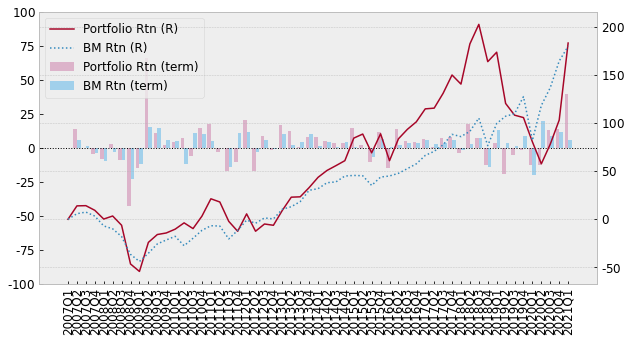

In [10]:
fs.draw_return(dfe)

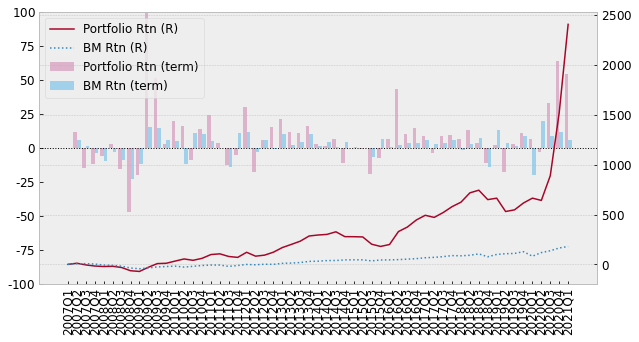

In [11]:
fs.draw_return(dfb)

## PER, PBR 분석
> 기간은 2007년 1분기 최초 투자 ~ 2021년 1분기까지 완료(15년간)  

- *PER backtesting*
CAGR: 7.71%  
Accumulated return: 183.02%  
Investment period: 14.0yrs  
Sharpe ratio: 0.42  
MDD: -59.86%  
- *PBR backtesting*
CAGR: 25.86%  
Accumulated return: 2407.80%  
Investment period: 14.0yrs  
Sharpe ratio: 3.24  
MDD: -73.92%  
1. PER 보다 PBR을 하였을때 보다 얻을 수 있는 이익이 훨씬 높다.
2. Sharp ratio는 PER보다 PBR이 약 8배 가량 높으므로 PBR의 risk가 훨씬 크다고 할수 있다.  
3. MDD역시 PBR이 더 높으므로 역시 risk가 크다고 할 수 있다.